# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [107]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

+ The Smartcab doesn't move at all during the simulation. At each start of the simulation the Smartcab is placed at a random location on the grid and remains there for the duration of the simulation.
+ Seems like the driving agent is receiving two rewards, one of them positive and the other one negative. When there's a red  light and the agent doesn't move, there's a positive reward. When, however, there's a green light with no oncoming traffic and the agent doesn't move, there is a negative reward. So far this simple behaviour is expected.
+ As mentioned above, when there's a red light and the agent is not moving, there's a positive reward. This seems to be reasonable. On the other hand, when there's a green light without oncoming traffic, and the agent doesn't move the reward is negative.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
+ In the agent.py file run() method we see that each step has a few parameters and some of them are flags (I am assuming the question asks for variables that take either True or False values). One of these flags is the *verbose* flag that can be set when the Enironment class is initialized. When this flag is set to true, additional information will be printed to the terminal. Looking at the Environtment class in environment.py we observe that the act() method checks this flag before printing additional information. Next, let's take a look at the *enforce_deadline* flag. The default value of this flag is False. This value can be set when making an agent a primary agent. When this flag is set to True, the agent_deadline will be enforced, and the agent will fail if it doesn't reach its destination within the timeout duriation. Finally, let's look at the *display* flag when initalizing the Simulator. This flag is set to True by default and the game display will be rendered, if set to false there will be no display and the render() method in the simulator.py file will not run. This can be seen in the run() method in the simulator.py file.


+ In the environment.py file the act() method is called when an agent decides to perform an action.


+ In the simulator.py file the doc strings pretty much explain the difference between render_text() and render() functions. The render_text() function prints the simulation information to the terminal. This is also obvious from the multiple print statements. The render() function is responsible for maintaining the simulator display by updating it, and additionally printing information in the display about the agent's performance.


+ From the planner.py file next_waypoint() method we see that the East-West direction is checked first and a change in direction is made to correct the agent's path towards the correct destination.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


In [108]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** I ran a couple simulations, and the results are relatively consistent with each other. The best way to answer this question is to address each bullet point above:
+ The driving agent makes bad decisions approximately 40% of the time. To get the number of accidents as a result of bad moves, we sum the solid and dashed red lines together. From the plot above we see that less than 10% of the bad moves cause accidents. From the plot we see that most of the bad actions non-accident causing violations. I am actually suprised that the frequency of bad moves is not higher.

+ The reliability rate makes sense given the agent is moving randomly. The reliability rate is at 0% for the duration of training and testing. Given that the agent makes some many bad moves, and during each training and testing trial there were accidents, it is not suprising to see a consistent reliability rate of 0%.

+ We see that all the net rewards are negative. So, during each trail the agent is being penalized. I looked over the csv file to understand how the net_reward changes based on the actions the agent has taken, and clearly when there are major accidents, the net_reward tends to be higher. We see in the bad actions graph, as the major accidents increase, the rewards decrease on the right plot. Of course, we would have to account for the positive rewards from the good actions. Nevertheless, clearly the driving agent is getting penalized.

+ Looking at the bad actions chart, the results are relatively stable from trial to trial, within +/-5%. This is certianly expected given the random nature of the moves. What's interesting is that the average reward per action is getting worse. I noticed this in both simulations.

+ I definitely wouldn't take a ride in this smartcab. The safety and reliability ratings are F from the visualization above.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:** We can make a more powerful driving agent by considering all the environmental features available. However, seems as if not all features are equally important, and we may be able to disregard one or more of them. In order to better asses the importance of each move, I looked at the act() method from the Environment class to understand how violations are evaluated. In order to decide which features are relevant, we need to consider whether a feature is necessary for a driving agent to perform a safe action. I am assuming that the other agents on the grid make only valid moves. 

+ *waypoint*: this seems to be very important. The driving agent can drive safely around as much as it wants, but if it doesn't get to its destination it's probably useless. So, whatever policy we come up with has to somehow utilize the *waypoint* in deciding what action to take next. This feature is important for efficiency, so that the agent can get to its destination within the deadline.

+ *light*: Light is probably the single most important input. Violating the proper move at a red light will result in an accident causing violation. The only move allowed at a red light is turning right, only when there's no car coming from the left side. This logically leads us to conculde that the *left* input is also important. This input is mostly important for safety.

+ *left*: As shown above, this *left* input is important if the driving agent wants to make a right turn at a red light. The agent can only turn right (at a red light) if there's no oncoming agent from the left side, or if there is an oncoming agent from the left side that's not going to go forward, but will turn to the left or right. This input is important for both safety and efficiency. The relevance for safety is self-explanatory. The reason this input is important for efficiency, is so that the driver can make a right turn at a red light, and not waste idle moves at a red light.

+ *right*: This feature may not be an essential input for safety or efficiency. If the driving agent has a green light, then it has the right of way for going forward, and turning right. If there's another agent from the right side making a right turn, it will have to yield. So, for the time being, I am not going to consider this input in the policy.

+ *oncoming*: This input is important for safety. If our driving agent wants to make a left at a green light, it must yield to oncoming traffic whether the oncoming agent is making a right or going forward.

+ *deadline*: This feature is important in the sense that if our agent doesn't reach its destination within the deadline, it  will fail. However, there's not much we can do about this feature. This just provides information about the quantity of remaining moves the driving agent has. I am not going to consider this input in the policy.

Givent he discussion above, I am going to consider the following features in the policy: *waypoint, light, left, oncoming*

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** In **Question 4** I selected four features. The possible values for each feature are:

+ *waypoint*: None, forward, left, right
+ *light*: red, green
+ *left*: None, forward, left, right
+ *oncoming*: None, forward, left, right

Assuming that all the features are independent, we can have 4\*2\*4\*4 = 128 possible states. However, the features are not independent of each other. The state of certain features can significantly affect the relevance of the other features. For example if the *light* is red, then the state of the *oncoming* input is not relevant. The state of the *left* feature is only relevant if the primary driving agent wants to turn right. So, as can be seen the relevant number of states will fewer if considering the relationship between the different states.

I identified the following state combinations that really matter (N/A means the state can be anything):
+ light: red, waypoint: forward, left: N/A, oncoming: N/A - best move: none
+ light: red, waypoint: left, left: N/A, oncoming: N/A - best move: none
+ light: red, waypoint: none, left: N/A, oncoming: N/A - best move: none
+ light: red, waypoint: right, left: right, oncoming: N/A - best move: make right
+ light: red, waypoint: right, left: left, oncoming: N/A - best move: make right
+ light: red, waypoint: right, left: none, oncoming: N/A - best move: make right
+ light: red, waypoint: right, left: forward, oncoming: N/A - best move: none
+ light: green, waypoint: forward, left: N/A, oncoming: N/A - best move: go forward
+ light: green, waypoint: right, left: N/A, oncoming: N/A - best move: make right
+ light: green, waypoint: left, left: N/A, oncoming: none - best move: make left
+ light: green, waypoint: left, left: N/A, oncoming: forward - best move: none
+ light: green, waypoint: left, left: N/A, oncoming: right - best move: none
+ light: green, waypoint: left, left: N/A, oncoming: left - best move: make left

The N/A entries above can be filled with any state for that particular input. This would expand the possible states significantly, and many trials would required to encounter each state and have a policy for that state. In the steps below we can have a epsilon function that allows many random moves for the first few trials in an effort to encounter as many of the states as possible.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

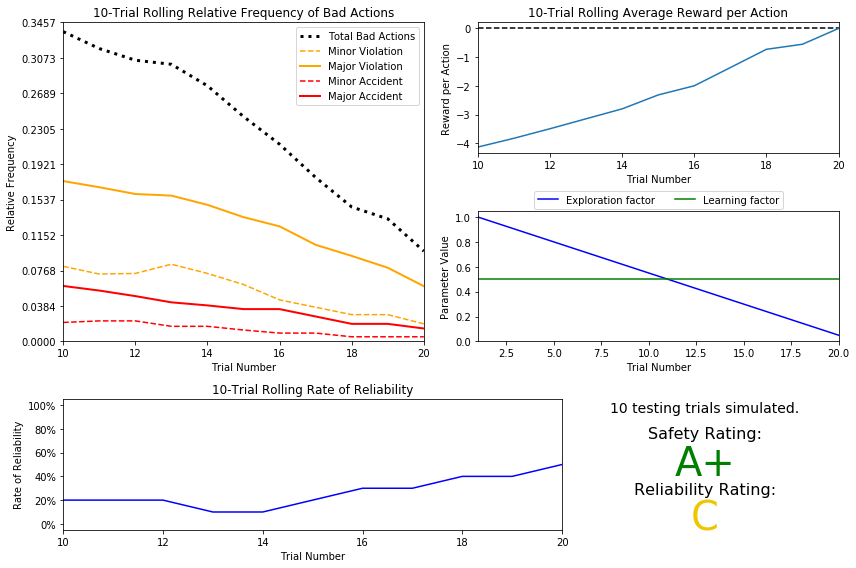

In [109]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** I ran the simulation 10 times. In all, except one of the simulations, the safety rating was **A+**. The reliability rating, however, was less consistent. Out of the 10 runs there were 5 **A/A+** scores, the remaining 5 runs had **F**, **C** or **D** for the reliability score. Hopefully in the steps below the reliability rating will become more reliable.

+ Looking at the visualizations for the basic driving agent and the default Q-learning agent I don't see any similiarities. Even a basic Q-learning agent performs much-much better than the basic driving agent. Using the default Q-learning driving agent all metrics improve with each trial. I guess the only similiarity between the two (basic driving agent and default Q-learning agent) driving agents are the starting values of the metrics. However, for the basic driving agent these get worse or stay the same, whereas for the default Q-learning agent they all improve.

 From the visualization above we see that minor and major violations steadily decline with each trial. The major and minor accidents also decline, however, they don't reach 0%. Ideally these traces should converge to 0.The relative frequency of total bad actions dropped from approximately 35% to 10%, which is still high. Hopefully this will be improved in the optimized learning agent.
 
 We also see that the reliability starts to steadily increase after the 14th trial. The reward per action also increases steadily with each trial.
 
+ The driving agent required 20 training trials. This is consistent with a linearly decreasing epsilon by 0.05. I checked the *run* method of the Simulator class and the tolerance is set to 0.05 by default. This means that the driving agent will complete 20 training trials for epsilon to drop from 1 to below 0.05.

+ The decaying function seems to work properly. We see that the blue trace representing the decaying epsilon function starts at 1.0 and linearly drops to below the threshold. I checked the CSV log, and seems like the reason there were only 20 runs is because of python's floating point arithmetic. The final value of epsilon was 0.0499999..., which turns out to be smaller than the threshold of 0.05, hence the training stopped. In reality there should have been 21 training trails.

+ As mentioned above all violations decrease as the training trails increase. The relative frequency of total bad actions dropped from approximately 35% to 10%.

+ Both the safety and reliability rating were **F** for the initial driving agent. Both of these scores improved significantly for the default learning agent. As already mentioned, the safety score is consistently high. I could have chosen a simulation with an **A** score for reliability, however, I wanted the visualization to be representative of all the simulations. A **C** score is representative of the average reliability score for the default learning agent, which isn't bad.

Ideally all the traces in the bad actions plot should be much lower towards the end of the simulation, especially the major and minor accidents. I tend to think that the agent needs more time for exploration (high epsilon). In that case more random moves will occur, as a result more violations will occur and the agent will incur penalities for those bad moves. As a result the bad moves will be prevented during the testing stage.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

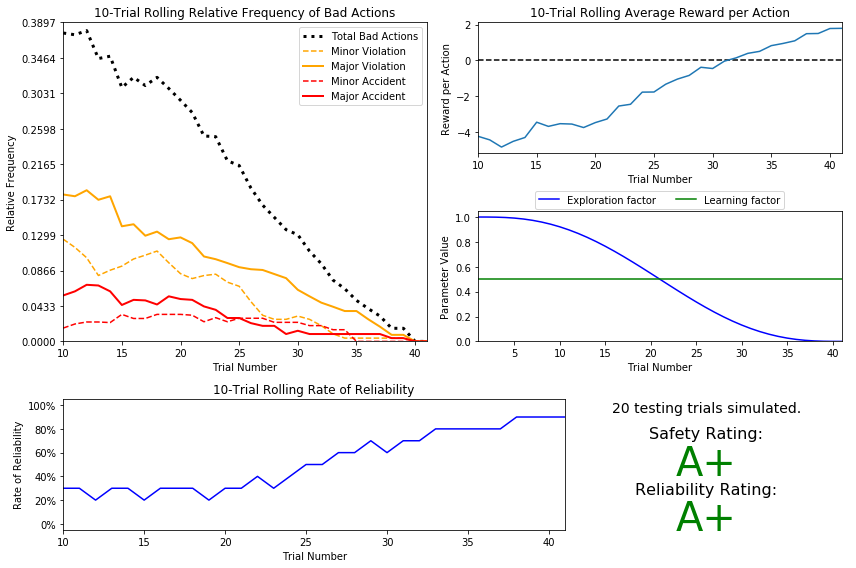

In [110]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

+ For the decaying function I tried all the suggestions mentioned above. I also tried combinations of them. However, they all performed poorly. Some of them had a low starting epsilon value, which results in low exploration. Some of them decay too quickly. Therefore, based on my understanding of the problem, I chose a differenet decaying function. I chose the *smoothstep* function (https://en.wikipedia.org/wiki/Smoothstep). This function provided the desired characteristic I was looking for. A smooth decay, with a small slope near 1 and near 0. This means the agent will have ample opportunity for expliration. Setting a low threshold value in the Simulator class will also provide ample opportunity for learning. 

+ There were a total of 41 training trials. 

+ The Simulator epsilon threshold was set to 0.0001. I chose this low threshold value so that the agent may have more opportunity for learning. I didn't change the alpha value and left it at its default as recommended.

+ One of the things that I paid attention to was the reliability score. I ran the simulation 10 times, and each simulation had 20 test runs. 7 out of the 10 times the reliability score was **A** or **A+**, 2 of the runs resulted in a reliability score of **B**, and there was one **F**. The safety score was **A+** for all runs. To me this is significant improved compared with the default learner, because the reliability score is much more reliable. Besides the reliability score, the remaining metrics also improved compared to the default learner. The bad actions chart shows that all violations converge very close to 0 towards the end of the simulation. The reliability score gradually increases to about 90%. The reward per action plot too increases linearly as the trail number increases, but this is similiar to the default learning agent.

+ From the visualization above seems as if the Q-learner learned an appropriate policy.

+ Overall I am satisified with the reliability and safety, because this is a simulation. The reliability score can certainly be improved to be more consistent, which would require more fine tuning of the parameters. Nevertheless, the current Q-learner performs satisfactory, and is certainly better than the default Q-learner.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** In order to answer this question I am going to follow a similiar approach as in Question 5.

I selected the following input features for my learning agent, which are shown along with their possible states:
+ *waypoint*: None, forward, left, right
+ *light*: red, green
+ *left*: None, forward, left, right
+ *oncoming*: None, forward, left, right


1. I identified the following state combinations that really matter. Note that N/A for a particular feature means it can take any state, and it shouldn't affect the optimum action of the driving agent. Also, in parentheses I show the string key that identifies this state in the dictionary.
 + light: red, waypoint: forward, left: N/A, oncoming: N/A - best move: none *(Q dictionary key = "red")*
 + light: red, waypoint: left, left: N/A, oncoming: N/A - best move: none *(Q dictionary key = "red")*
 + light: red, waypoint: none, left: N/A, oncoming: N/A - best move: none *(Q dictionary key = "red")*
 + light: red, waypoint: right, left: right, oncoming: N/A - best move: make right *(Q dictionary key = "red right")*
 + light: red, waypoint: right, left: left, oncoming: N/A - best move: make right *(Q dictionary key = "red right")*
 + light: red, waypoint: right, left: none, oncoming: N/A - best move: make right *(Q dictionary key = "red right")*
 + light: red, waypoint: right, left: forward, oncoming: N/A - best move: none *(Q dictionary key = "red right forward")*
 + light: green, waypoint: forward, left: N/A, oncoming: N/A - best move: go forward *(Q dictionary key = "green")*
 + light: green, waypoint: right, left: N/A, oncoming: N/A - best move: make right *(Q dictionary key = "green")*
 + light: green, waypoint: left, left: N/A, oncoming: none - best move: make left *(Q dictionary key = "green left None")*
 + light: green, waypoint: left, left: N/A, oncoming: forward - best move: none *(Q dictionary key = "green left forward")*
 + light: green, waypoint: left, left: N/A, oncoming: right - best move: none *(Q dictionary key = "green left right")*
 + light: green, waypoint: left, left: N/A, oncoming: left - best move: make left *(Q dictionary key = "green left None")*
 + light: green, waypoint: none, left: N/A, oncoming: N/A - best move: make left *(Q dictionary key = "green None")*
 
 The list above essentially represents the driving rules in the most of the states in the US.
 
2. The resulting policy seems interesting, and a bit different than what I intended. 

 + Looking at the **red** state there's positive reward if the agent makes a right or doesn't take an action at all. In my policy above I intended no action in this state. However, the *none* move has a greater reward, so this will behave correctly during the testing stage. 
 + Looking at the **red right** state there's positive reward for making a right, but there's also a small positive reward for taking no action. However, the correct move in this state is *right* and this is the move with the highest reward in the policy. So, the agent should perform properly.
 + Looking at the **red right forward** state in the policy, taking no action has the highest reward. All the other moves have large negative penalities. Therefore, the agent should act properly when in this state.
 + Looking at the **green** state in the policy, there are positive rewards for moving forward and making a right. However, since moving forward has the highest reward, the agent will always go forward in this state. This is certainly not correct, and I can see how this can affect my reliability score. The correct thing for me to do would be to split this state into two different ones, so that the agent can move forward when it needs to, or make a right when it needs to. This is an area where my Q-learner can be improved.
 + Looking at the **green left None** state, the highest reward is for making a left. According to my policy above, this is the correct move.
 + Looking at the **green left forward** state in the Q-learning policy, my intended move would be to wait (take no action) until the oncoming traffic has passed. However, the actual policy shows a penality for taking no action, and gives a positive reward for making a right. This is definitely not correct. The agent will move fruther away from its target if the waypoint is left, but the agent turn right.
 + Looking at the **green left right** state in the Q-learning policy, my intended move would be to wait (take no action) until the oncoming traffic has passed. However, the actual policy shows positive reward for moving forward. This can be acceptable if the destination is ahead of the agent's current position, but otherwise it will cause the agent to move further away from its destination.
 + The last state I intended, **green None** is not in the actual policy, becuase when the waypoint is *none*, the simulation stops, since the agent is at its destination.
 
3. For example, in the policy table the **green left none** state has the highest reward for making a left. According to my intended policy above, this state will occur when the waypoint is left, and there's no oncoming traffic, or the oncoming agent is turning left. The correct action for the learning agent would be to proceed with the left move, because it's safe.

 Another example of correct action can be seen when the state is **red right**. This state will occur, when the agent is at a red light, the waypoint is *right* and the there's no agent coming from the left side, or if there's an agent coming from the left side which is turning left, or right. In this scenario it is safe for our agent to turn right. This is clearly correct in the actual policy, since turning right has the highest reward.
 
4. One problem I observes is when the state is **green**. There are positive rewards for moving forward and making a right. However, since moving forward has the highest reward, the agent will always go forward in this state. This is certainly not correct, and I can see how this can affect my reliability score. The correct thing for me to do would be to split this state into two different ones, so that the agent can move forward when it needs to, or make a right when it needs to. This is an area where my Q-learner can be improved. Although this will not affect the safety score, but it will certainly affect the reliability score, since the agent may possibly move further away from the destination.

 Another example where the policy is not completely accurate is in the **green left right** state. This state occurs when the light is green, the waypoint is left, and there's an oncoming agent that is turning right. The correct move would be to yield to the agent and then make a left turn. The policy has the highest reward for moving forward. As mentioned above this may move the agent further from its destination.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
+ The two factors are somewhat related. The characteristic related to the environment is that the environment is random, the agents start at random locations, the destination is randomly chosen every time, and the lights are in random states. This brings us to the smartcab characteristic, where the smartcab has no way of knowing in advance how far the destination is, or what it will encounter on its way towards the destination. So, these two characteristics are intertwined. Basically, it's the randomness of the environment, which means the smartcab cannot trade future high rewards for current moves, because it doesn't have a visibility into the future state of the environment.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.